In [1]:
import pandas as pd # data analytical library
import numpy as np #fast linear algebra
import matplotlib.pyplot as plt #visualization
import seaborn as sns #statistical visualization

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.shape

(1460, 81)

In [6]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
na_value=data.columns[data.isnull().sum()>0]
na_value

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
na_data=data[na_value]
na_data.head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [9]:
na_data.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
na_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [11]:
#Using mean to deal with numerical data
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

In [12]:
##Using mode to deal with categorical data
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [13]:
data.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [14]:
na_value=data.columns[data.isnull().sum()>0]
na_value

Index([], dtype='object')

In [15]:
data.shape

(1460, 76)

In [16]:
pd.set_option("display.max_columns", None)

In [17]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Data Transformation

In [18]:
data['YearBuilt_bin']= pd.cut(data['YearBuilt'], bins=[1870,1920,1970,2010], labels=(["Very Old","Old","Newly built"]))

In [19]:
data['OverallCond_bin']= pd.cut(data['OverallCond'], bins=[0,3,6,9] ,labels=(["Poor","Average","Good"]))

In [20]:
data['OverallQual_bin']= pd.cut(data['OverallQual'], bins=[0,4,7,10] ,labels=(["Poor","Average","Good"]))

In [21]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [22]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Id               1460 non-null   int64   
 1   MSSubClass       1460 non-null   int64   
 2   MSZoning         1460 non-null   object  
 3   LotFrontage      1460 non-null   float64 
 4   LotArea          1460 non-null   int64   
 5   Street           1460 non-null   object  
 6   LotShape         1460 non-null   object  
 7   LandContour      1460 non-null   object  
 8   Utilities        1460 non-null   object  
 9   LotConfig        1460 non-null   object  
 10  LandSlope        1460 non-null   object  
 11  Neighborhood     1460 non-null   object  
 12  Condition1       1460 non-null   object  
 13  Condition2       1460 non-null   object  
 14  BldgType         1460 non-null   object  
 15  HouseStyle       1460 non-null   object  
 16  OverallQual      1460 non-null   int64   


In [24]:
data.Id.count() #Total number of houses 

1460

In [25]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

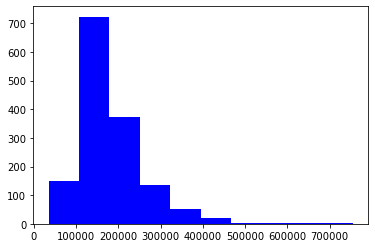

In [26]:
plt.hist(data.SalePrice, color='blue')
plt.show()

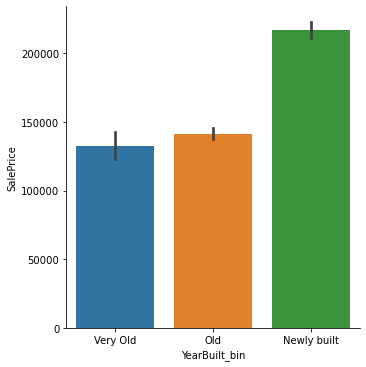

In [27]:
sns.catplot(data=data,x='YearBuilt_bin',y='SalePrice',kind='bar')  #comparing with years

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

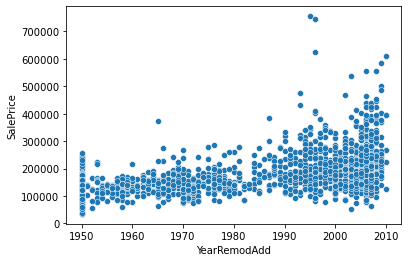

In [28]:
sns.scatterplot(data=data,x='YearRemodAdd',y='SalePrice') #comparing with years

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

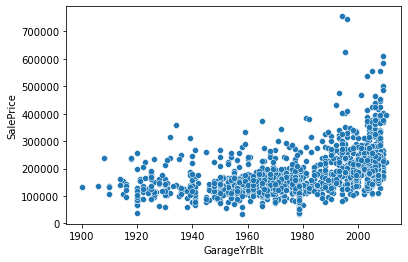

In [29]:
sns.scatterplot(data=data,x='GarageYrBlt',y='SalePrice') #comparing with years

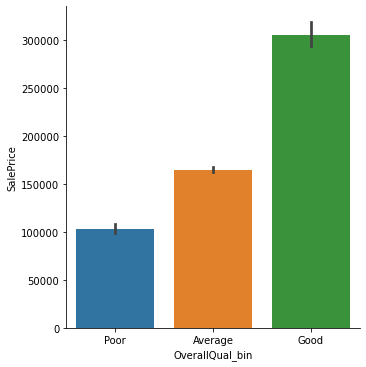

In [30]:
sns.catplot(data=data,x='OverallQual_bin',y='SalePrice',kind='bar') 

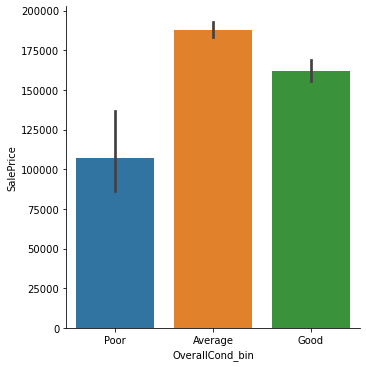

In [31]:
sns.catplot(data=data,x='OverallCond_bin',y='SalePrice',kind='bar') 

##### Relationship with numerical varibles 

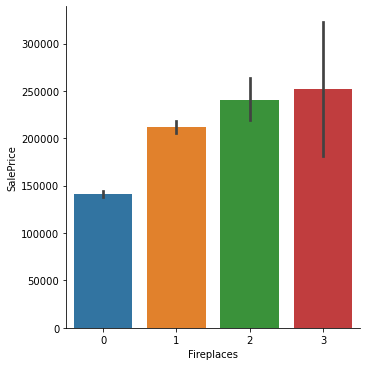

In [32]:
sns.catplot(data=data,x='Fireplaces',y='SalePrice',kind='bar')  # comparing features with sale price

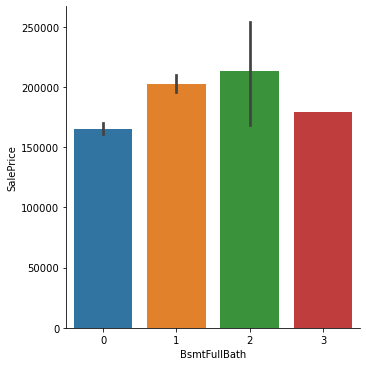

In [33]:
sns.catplot(data=data,x='BsmtFullBath',y='SalePrice', kind='bar') 

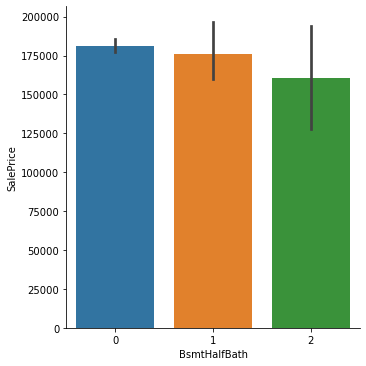

In [34]:
sns.catplot(data=data,x='BsmtHalfBath',y='SalePrice', kind='bar')

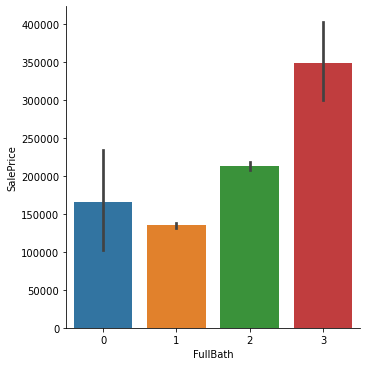

In [35]:
sns.catplot(data=data,x='FullBath',y='SalePrice', kind='bar')

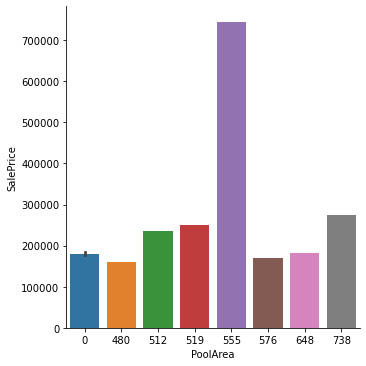

In [36]:
sns.catplot(data=data,x='PoolArea',y='SalePrice', kind='bar')

##### Relationship with categorical variables 

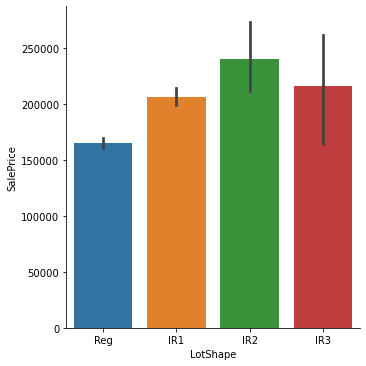

In [37]:
sns.catplot(data=data,x='LotShape',y='SalePrice',kind='bar')

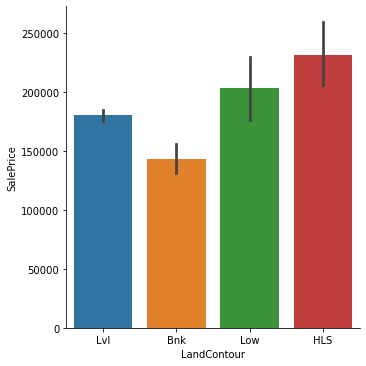

In [38]:
sns.catplot(data=data,x='LandContour',y='SalePrice',kind='bar')

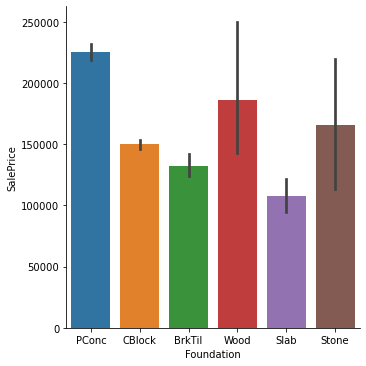

In [39]:
sns.catplot(data=data,x='Foundation',y= 'SalePrice',kind='bar')

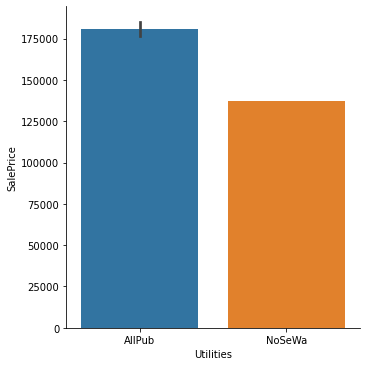

In [40]:
sns.catplot(data=data,x='Utilities',y='SalePrice',kind='bar')

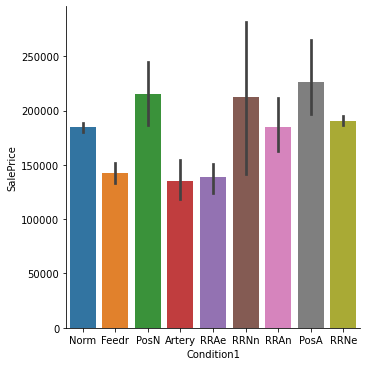

In [41]:
sns.catplot(data=data,x='Condition1',y='SalePrice',kind='bar')

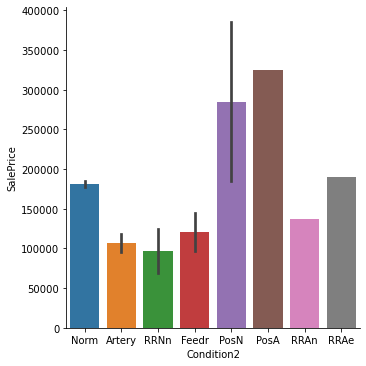

In [42]:
sns.catplot(data=data,x='Condition2',y='SalePrice',kind='bar')

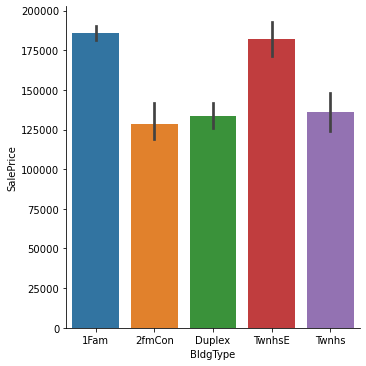

In [43]:
sns.catplot(data=data,x='BldgType',y='SalePrice',kind='bar')

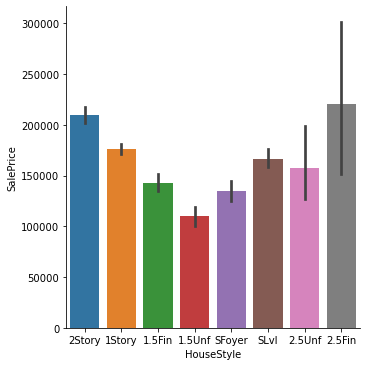

In [44]:
sns.catplot(data=data,x='HouseStyle',y='SalePrice',kind='bar')

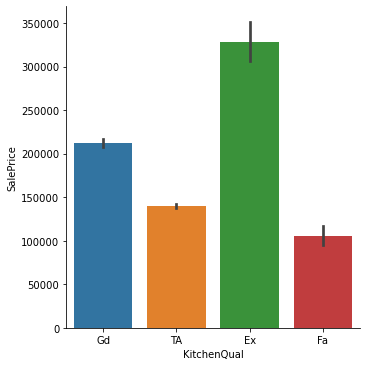

In [45]:
sns.catplot(data=data,x='KitchenQual',y='SalePrice',kind='bar') 

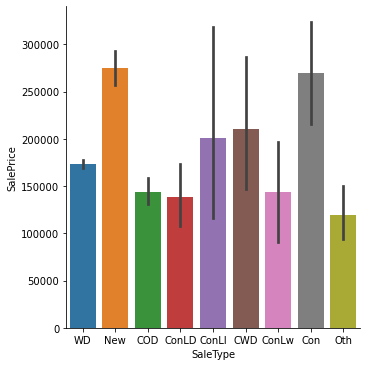

In [46]:
sns.catplot(data=data,x='SaleType',y= 'SalePrice',kind='bar') #Terms during house sale 

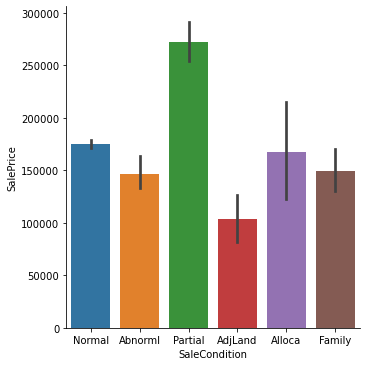

In [47]:
sns.catplot(data=data,x='SaleCondition',y= 'SalePrice',kind='bar')#Terms during house sale 

## Model building : Linear Regression

In [1]:
#feature selection
def feature_train_test_score(data):
    
    from sklearn.linear_model import LinearRegression
    import sklearn.preprocessing as pre
    from sklearn.preprocessing import LabelEncoder
    label_en=LabelEncoder()
    from sklearn.model_selection import train_test_split
    
    assignment_dict=[]
    
    X_scale=data.drop(['SalePrice','Id'],axis='columns')
    cat_df=X_scale.select_dtypes(exclude=[float,int]).columns
    for i in cat_df :
        X_scale[str(i)]=label_en.fit_transform(X_scale[str(i)])
    X_scale=X_scale.apply(pre.minmax_scale)
    Y=data['SalePrice']
    
    
    X=X_scale.copy()
    
    n=len(X_scale.columns)
    
    upper_index=3
    lower_index=0
    
    while upper_index<=n:
        
        X_scale=X.drop(X.columns[lower_index:upper_index],axis='columns')
        x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=1234456)
        dropped_cols=X.columns[lower_index:upper_index]
        
        glm=LinearRegression()
        glm.fit(x_train,y_train)
        
        
        

        assignment_dict.append({

            'features':X_scale.columns,
            'Number of features':len(X_scale.columns),
            'train_score':glm.score(x_train,y_train),
            'test_score':glm.score(x_test,y_test)
        })

        
        
        upper_index+=3
        lower_index+=3
    
    assignment=pd.DataFrame(assignment_dict)
    pd.set_option('display.max_colwidth', None)
    
    
    csv_file=assignment.to_csv("C:\\Users\\SARAH\\Desktop\\Machine Learning-KM\\Assignment-2.csv")
    return assignment

In [51]:
x=feature_train_test_score(data)
x

,features,Number of features,train_score,test_score
0,"Index(['LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'YearBuilt_bin', 'OverallCond_bin', 'OverallQual_bin'], dtype='object')",74,0.854250,0.870129
1,"Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'YearBuilt_bin', 'OverallCond_bin', 'OverallQual_bin'], dtype='object')",74,0.853742,0.862270
2,"Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'YearBuilt_bin', 'OverallCond_bin', 'OverallQual_bin'], dtype='object')",74,0.855187,0.867547
3,"Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotR

In [57]:
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pre
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=pre.LabelEncoder()
from sklearn.metrics import r2_score
import sklearn.linear_model as lm

In [59]:
for x in data.select_dtypes(include='object').columns:
    data[x]=le.fit_transform(data[x])

In [60]:
X_scale=data.drop(['SalePrice'],axis='columns')
cat_df=X_scale.select_dtypes(exclude=[float,int]).columns
for i in cat_df :
    X_scale[str(i)]=le.fit_transform(X_scale[str(i)])
X_scale=X_scale.apply(pre.minmax_scale)
Y=data['SalePrice']

In [61]:
#Splitting the data into test and train data
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=1234456)

In [62]:
#checking the shape of the test and train set
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1022, 78), (438, 78), (1022,), (438,))

In [64]:
#creating the linear regression model
glm=lm.LinearRegression()

In [65]:
#Fitting the model
glm.fit(x_train,y_train)

LinearRegression()

In [66]:
#Checking the test score
glm.score(x_test,y_test)

0.8660774276489247

In [67]:
#Checking the train score
glm.score(x_train,y_train)

0.8560569681185664

In [68]:
# Checking the R square value
print ("R^2 is: \n", glm.score(x_test, y_test))

R^2 is: 
 0.8660774276489247


In [69]:
#Predictions on the test data set.
y_pred = glm.predict(x_test)

In [70]:
# Checking the RMSE score
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred,squared=False))

RMSE is: 
 26537.121306471185


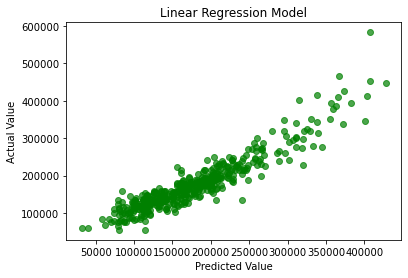

In [71]:
#Plotting the scatter plot between the predicted value and the actual values
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.7,
            color='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.show()